<a href="https://colab.research.google.com/github/PMLS-2026/week-5-Chloe-Skye/blob/main/midterm_Final_commit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cancer Clusters:**

*Problem*

In this project I examined if cancer prevelance is random or if it shows dependance on environment correlating with higher instances of cancer in the same location.

*Analysis Techniques*

To investigate this question I used a variety of probability modeling techniques such as poisson distribution and uniform distribution. For accurate analysis of the given dataset all models were tested against the null hypothesis. Here the null hypothesis states that there is no correlation between cancer clusters and each cancer incidence in the given geographical region is purely independant and random.In other words the cancer cells on the map will follow a uniform distribution.

*Data*

This project used dataset 5, "London Incidents", attached in the textbook "Physical Models of Living Systems" by Philip Nelson
note: I used the londonincidents.npz file

*Results*

Beginning with plotting the attached data as a scatter plot it is clear some locations have more cancer incidents than others. To better quantify this, vertical and horizontal lines were drawn to create 144 equal "cells." Each cell acts as it's own sample. 144 cells was chosen to create samples that were not too large and thus unable to accurately seperate the data, but also not too large to result in very few incidents being collected in each sample.

After these cells were created, each dot per cell could be tallied and put into a bar graph so visualize the distribution of cells across the region. Additional calculation took place to determine the average frequency of a dot or cluster in a given cell. This used the formula f(l)/nm = u. Using this calulation u was estimated as 6.61.

A probabiliy estimate of this data using a poisson distribution was graphed over that calulated from the data. Below is a copy of this graphic. This shows a close match between the poisson distribution estimated outcomes and the measured outcomes however it is not a complete match. There are only four points that this model would calculate accuratley the actual measured value.
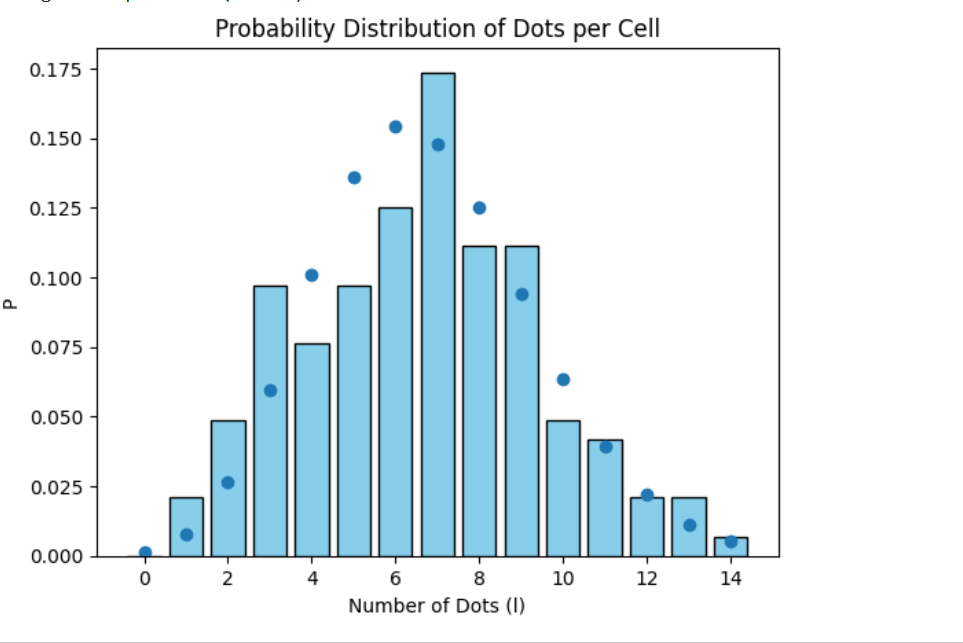

That said, the null hypothesis would test against a uniform distribution with an average of 6.61. The bar graph of probability for frequency of cancer within a cell was compared with a histogram of uniform distribution. Note: For the histogram to share a similar u value as the cancer clustur graph the range had to be limited frm 0 to 13.22.

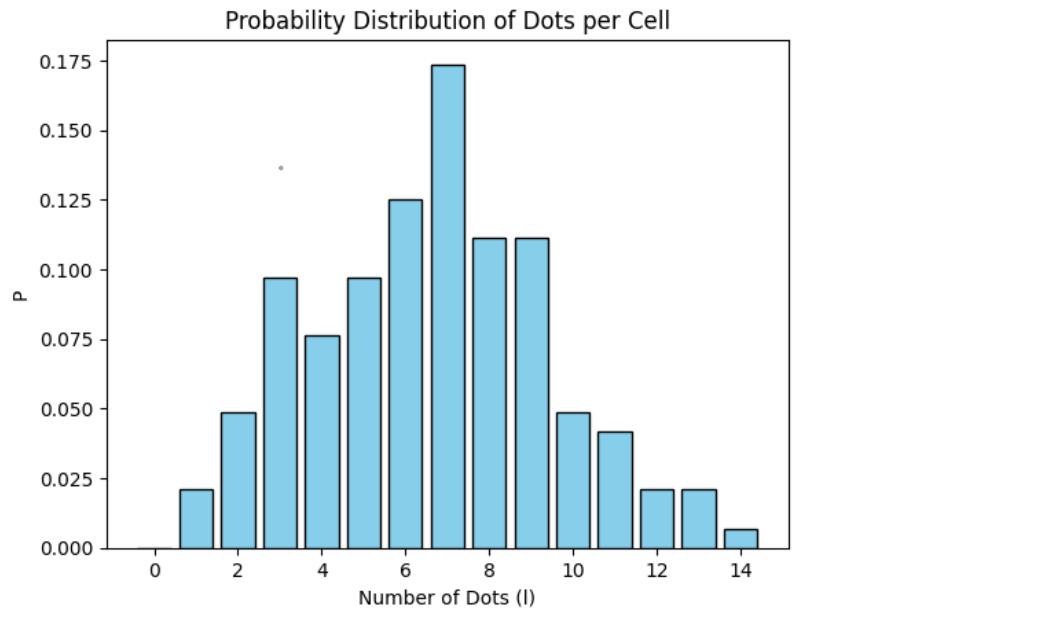

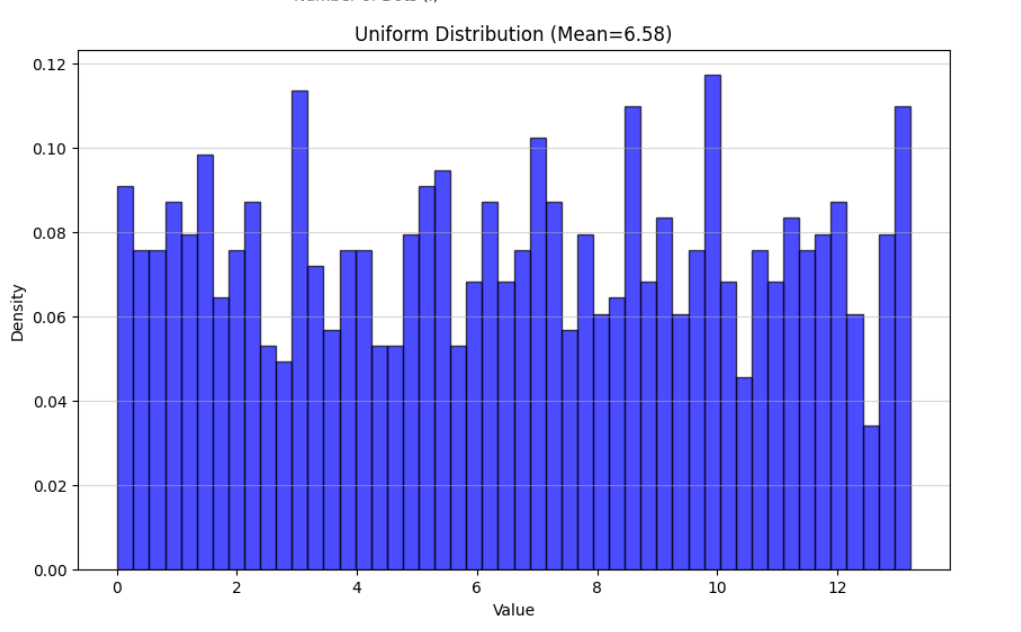


Comparing these two above graphs it is clear that the measured distribution does not follow a uniform distribution and thus rejects the null hypothesis

To further test these findings sample data was overlayed on the original plot of cancer incidences, refrence the plot below. Orange is the original cancer cluster data while blue is the sample uniform distribution data.

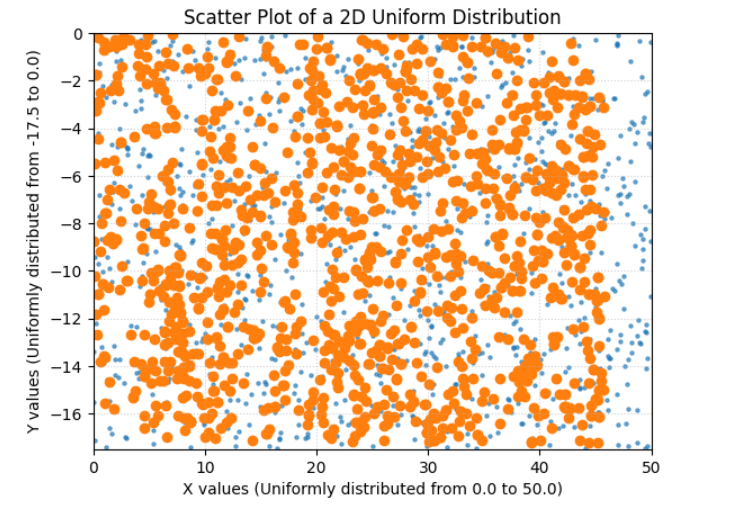

There is considerable variance from the plot of uniformly distributed dots versus those mesured. This too rejects the null hypothesis and points to a correlation for the clumping of cancer in these sample cells.

Refrence below for the explicit coding for each graphic and the mathmatical analysis used.Note many resources were refrenced in the creation of this coding project including: Gemini, stackoverflow, matplotlib guide, A Student's Guide to Physical Modeling with Python, and Physical Models of Living Systems

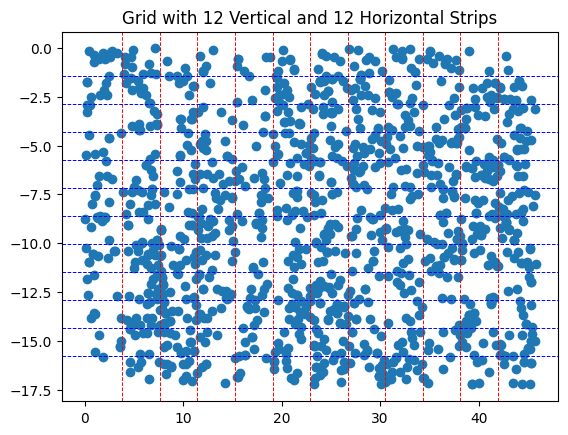

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker # Import for MultipleLocator
data = np.load('/content/londonIncidents.npz')
x = data['all']
y = data['allrefs']

# The original error occurred because x and y had different numbers of rows.
# x had 500 rows and y had 4 rows.
# For scatter plot of 2D coordinates (e.g., [lat, lon]), it's common to plot
# the first column against the second column of a single array.
# Let's plot the coordinates from 'all' data.
plt.scatter(x[:, 0], x[:, 1])
N = 12  # Vertical strips (lines = N-1)
M = 12  # Horizontal strips (lines = M-1)

ax = plt.gca() # Get the current Axes object

# 3. Add Vertical Lines (dividing x-axis into N equal strips)
# The loop variable `i` was previously used as a global variable, but `ax` was not defined. It is now defined.
# Additionally, `10` is an arbitrary range, it should be based on the actual data range.
# Let's use the actual x-range of the data.
x_min, x_max = x[:, 0].min(), x[:, 0].max()
for i in range(1, N):
    ax.axvline(x_min + i * (x_max - x_min) / N, color='red', linestyle='--', linewidth=0.7)

# 4. Add Horizontal Lines (dividing y-axis into M equal strips)
# Assuming y data ranges roughly from -1 to 1
y_min, y_max = x[:, 1].min(), x[:, 1].max() # Use y-range from x data for consistency with scatter plot
for j in range(1, M):
    ax.axhline(y_min + j * (y_max - y_min) / M, color='blue', linestyle='--', linewidth=0.7)

plt.title(f'Grid with {N} Vertical and {M} Horizontal Strips')

# The original error was here. set_xticks and set_yticks expect an array of locations.
# Using MultipleLocator to set major ticks (and thus grid lines) at regular intervals.
ax.xaxis.set_major_locator(mticker.AutoLocator()) # Let matplotlib choose appropriate major ticks
ax.yaxis.set_major_locator(mticker.AutoLocator()) # Let matplotlib choose appropriate major ticks

#plt.grid(True) # Display grid lines at the major tick locations.
#plt.show()

# You could also plot 'allrefs' separately if desired:
# plt.scatter(y[:, 0], y[:, 1], color='red', marker='x', label='References')

Analysis of 144 Cells:
Dots (l)   | Freq F(l)  | Prob Pest(l)
------------------------------------
0          | 0          | 0.0000      
1          | 3          | 0.0208      
2          | 7          | 0.0486      
3          | 14         | 0.0972      
4          | 11         | 0.0764      
5          | 14         | 0.0972      
6          | 18         | 0.1250      
7          | 25         | 0.1736      
8          | 16         | 0.1111      
9          | 16         | 0.1111      
10         | 7          | 0.0486      
11         | 6          | 0.0417      
12         | 3          | 0.0208      
13         | 3          | 0.0208      
14         | 1          | 0.0069      
------------------------------------
Total Dots: 953
Average dots per cell (lambda): 6.6181


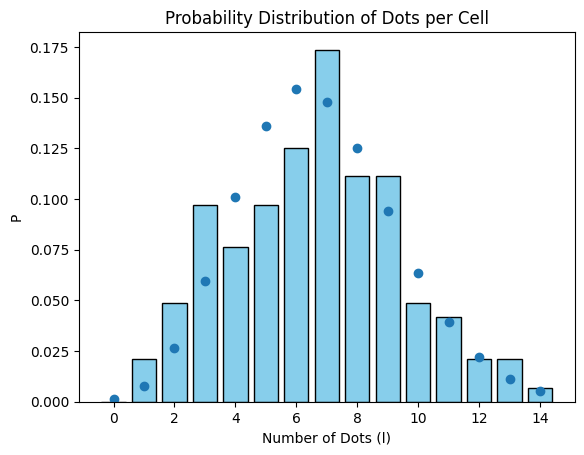

In [3]:
import numpy as np
import math

# 1. Input Data: Replace this list with your actual counts from each cell
# Example: [0, 1, 2, 0, 1, 1, 0, 3, 2, 1...]
dot_counts = [12, 9, 2,7, 6, 7, 6, 2, 1, 1,7,  11, 8, 5, 12, 7, 11, 8, 7, 7, 1, 4, 3, 7, 7, 8, 9, 9, 4, 3, 6, 9, 8, 10, 6, 10, 4, 3, 6, 3, 3, 5, 6, 5, 3, 9, 6, 4, 5, 13, 8, 7, 3, 6, 9, 8, 6, 8, 8, 5, 5, 6, 5, 11, 9, 13, 9, 9, 8, 10, 3, 9, 5, 5, 4, 7, 7, 7, 9, 6, 9, 10, 8, 4, 8, 13, 8, 2, 10, 7, 9, 6, 6, 8, 7, 2, 5, 3, 2, 12, 3, 14, 4, 7, 7, 3, 7, 11, 6, 2, 10, 5, 7, 8, 11, 7, 7, 6, 8, 10, 7, 9, 11, 3, 4, 5, 7, 9, 9, 5, 4, 4, 6, 3, 5, 7, 6,4, 7, 8, 7, 6, 3, 2]

# 2. Basic Variables
NM = len(dot_counts)  # Total number of cells
total_dots = sum(dot_counts)
avg_dots = total_dots / NM

# 3. Calculate Frequencies F(l)
# find the max number of dots to set the range
max_l = max(dot_counts)
frequencies = np.bincount(dot_counts)

print(f"Analysis of {NM} Cells:")
print(f"{'Dots (l)':<10} | {'Freq F(l)':<10} | {'Prob Pest(l)':<12}")
print("-" * 36)

# 4. Tally and Calculate Probabilities
for l in range(len(frequencies)):
    count = frequencies[l]
    p_est = count / NM
    print(f"{l:<10} | {count:<10} | {p_est:<12.4f}")
#5 Set up labels for graph
print("-" * 36)
print(f"Total Dots: {total_dots}")
print(f"Average dots per cell (lambda): {avg_dots:.4f}")
plt.bar(range(len(frequencies)), frequencies / NM, color='skyblue', edgecolor='black')
plt.title("Probability Distribution of Dots per Cell")
plt.xlabel("Number of Dots (l)")
plt.ylabel("P")

#6 Plot scatter plot based off of poisson distribution calculation
t=np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],[ .00115, .007836,  .0264, .0596, .101, .136, .154, .148, .125, .0941, .0636, .03912, .022, .0114, .0055]])
plt.scatter(t[0, :], t[1, :])
plt.show()
prob = np.zeros(15)
i=1
while i<=14:
  e=np.exp(-6.61)
  f=math.factorial(i)
  prob[i]=6.61**i*e/f
  i = i+ 1

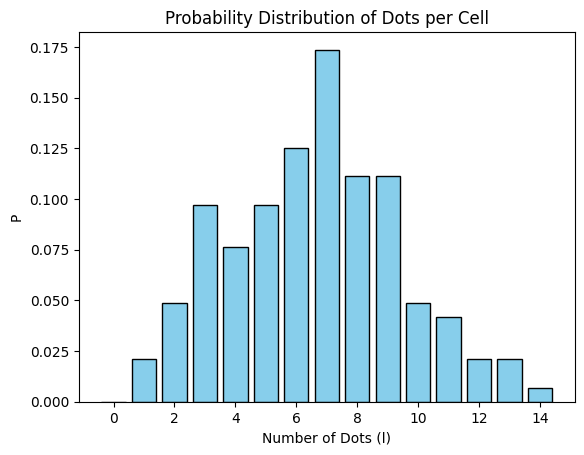

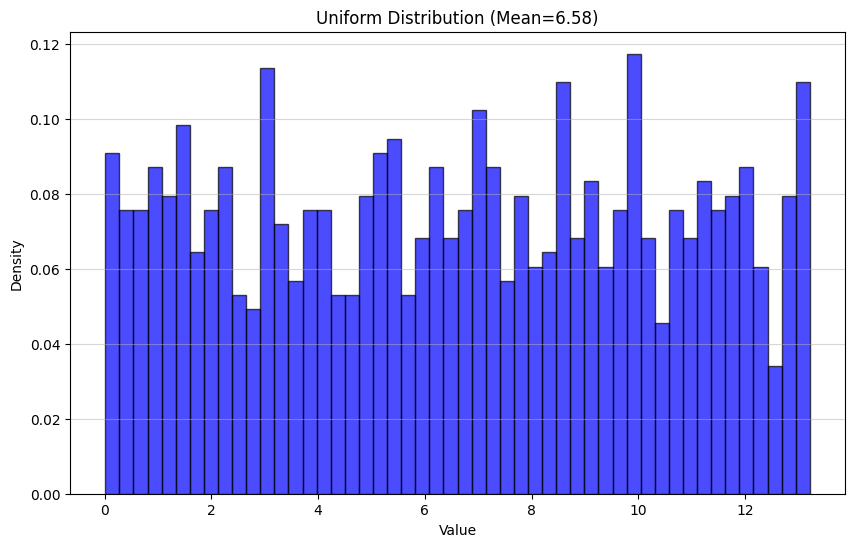

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#1. plot the bar graph from before
plt.bar(range(len(frequencies)), frequencies / NM, color='skyblue', edgecolor='black')
plt.title("Probability Distribution of Dots per Cell")
plt.xlabel("Number of Dots (l)")
plt.ylabel("P")


# 2. Generate random data
low = 0
high = 13.22
size = 1000
data = np.random.uniform(low, high, size)

# 3. Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

# 4. Add labels and title for histogram
plt.title(f'Uniform Distribution (Mean={np.mean(data):.2f})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.5)

# Show the plots
plt.show()



NameError: name 'x' is not defined

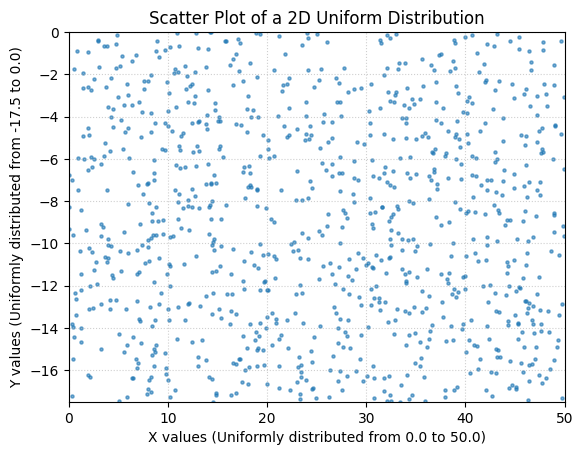

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 1. Define the boundaries and number of points
n = 953 # Number of points same as amount of dots calculated from the original data
x_min, x_max = 0, 50 #to match data range for original data
y_min, y_max = -17.5, 0

# 2. Generate uniformly distributed random data for X and Y
x_rand = np.random.uniform(x_min, x_max, n)
y_rand = np.random.uniform(y_min, y_max, n)

# 3. Create the scatter plot
fig, ax = plt.subplots()
ax.scatter(x_rand, y_rand, s=5, alpha=0.6)

# 5. Set plot titles and labels
ax.set_title("Scatter Plot of a 2D Uniform Distribution")
ax.set_xlabel("X values (Uniformly distributed from {:.1f} to {:.1f})".format(x_min, x_max))
ax.set_ylabel("Y values (Uniformly distributed from {:.1f} to {:.1f})".format(y_min, y_max))

# 6. Set axis limits and display the plot
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.grid(True, linestyle=':', alpha=0.6)
plt.scatter(x[:, 0], x[:, 1])
plt.show()
